In [2]:
import requests
from bs4 import BeautifulSoup

In [15]:
# Set up eutils

eutils_url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/'

search_retmax = '&retmax=500'

eutils_fetch = eutils_url + 'efetch.fcgi?db=pubmed&retmode=xml&id='

#eutils_search = eutils_url + 'esearch.fcgi?db=pubmed&field=word&term='

eutils_search = eutils_url + 'esearch.fcgi?db=pubmed&field=&term='
#eutils_search = eutils_url + 'esearch.fcgi?db=pubmed&term='

In [16]:
# Set up urls
erp = 'P50'

url = eutils_search + '"' + erp + '"' + search_retmax

#url = eutils_search + '"' + erp + '"AND"' + term + '"'

#url_not = eutils_search + '"' + erp + '"' + '"NOT"' + '"cell"' + search_retmax

In [23]:
page = requests.get(url)
page_soup = BeautifulSoup(page.content)
ids = page_soup.find_all('id')

In [25]:
#page_soup   # 39697

In [26]:
import erpsc.words as W

In [52]:
ids = ids[0:5]

In [53]:
# Check fetching single article
ids_str = W._ids_to_str(ids)
art_url = eutils_fetch + ids_str
art_page = requests.get(art_url)
art_page_soup =BeautifulSoup(art_page.content, 'xml')

In [54]:
#art_page_soup

In [55]:
articles = art_page_soup.findAll('PubmedArticle')
n = len(articles)

In [50]:
articles[40].find('ArticleTitle').text

u'Effects of Dietary Selenium on Inflammation and Hydrogen Sulfide in the Gastrointestinal Tract in Chickens.'

## Test out Wordclouds

In [2]:
from wordcloud import WordCloud

In [3]:
text = open('constitution.txt').read()

In [4]:
wordcloud = WordCloud().generate(text)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 399.5, 199.5, -0.5)

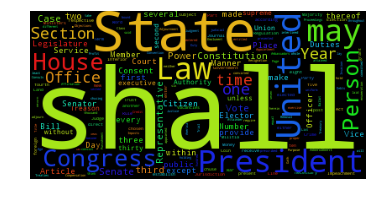

In [8]:
plt.imshow(wordcloud)
plt.axis("off")

In [10]:
wordcloud.generate_from_frequencies?